<a href="https://colab.research.google.com/github/bharadwaj-chukkala/Detection_of_Malignant_Skin_Cancer_using_a_CNN/blob/master/Detection_of_Malignant_Skin_Cancer_using_a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Summary of the Skin Cancer Data**:

1. Total number of images: 2357
2. Images consist of Bening and Malignant Oncological Diseases.
3. Data was gathered by ISIC (International Skin Imaging Collaboration).
4. Images were sorted according to the classification taken with ISIC.
5. All the subsets were divided into the same number of images, with an excpetion for melanomas whose images are slightly dominant.

**Diseases in the Dataset**
 1. Actinic keratosis
 2. Basal cell carcinoma
 3. Dermatofibroma
 4. Melanoma
 5. Nevus
 6. Pigmented benign keratosis
 7. Seborrheic keratosis
 8. Squamous cell carcinoma
 9. Vascular lesion

## Importing Skin Cancer Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path to the root directory i.e the Skin Cancer Data
data_path = 'drive/MyDrive/Colab Notebooks/Skin cancer Data'


Mounted at /content/drive


### Importing all Libraries

In [ ]:
import pathlib
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
import PIL

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

## Creating the Dataset:
1. Train Data Set
    - Train
    - Validation
2. Test Data Set

In [ ]:
# Train DS Path
train_path = pathlib.Path(data_path + '/Train/')

# Test DS Path
test_path = pathlib.Path(data_path + '/Test/')

# Count of the images
training_img_count = len(list(train_path.glob('*/*.jpg')))      # Training Images
print(training_img_count)

testing_img_count = len(list(test_path.glob('*/*.jpg')))        # Testing Images
print(testing_img_count)

2239
118


Defining some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

### Creating the Training Dataset:
1. Using 80% of the data for Training
2. Rest will be used for validation

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               batch_size=batch_size,
                                                               image_size=(img_height,img_width),
                                                               label_mode="categorical",
                                                               seed=123,
                                                               subset="training",
                                                               validation_split=0.2)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds =tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                            batch_size=batch_size,
                                                            image_size=(img_height,img_width),
                                                            label_mode="categorical",
                                                            seed=123,
                                                            subset="validation",
                                                            validation_split=0.2)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [ ]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(len(class_names))
print(class_names)

9
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the Data

- We will visualize one image of each class listed in the Dataset

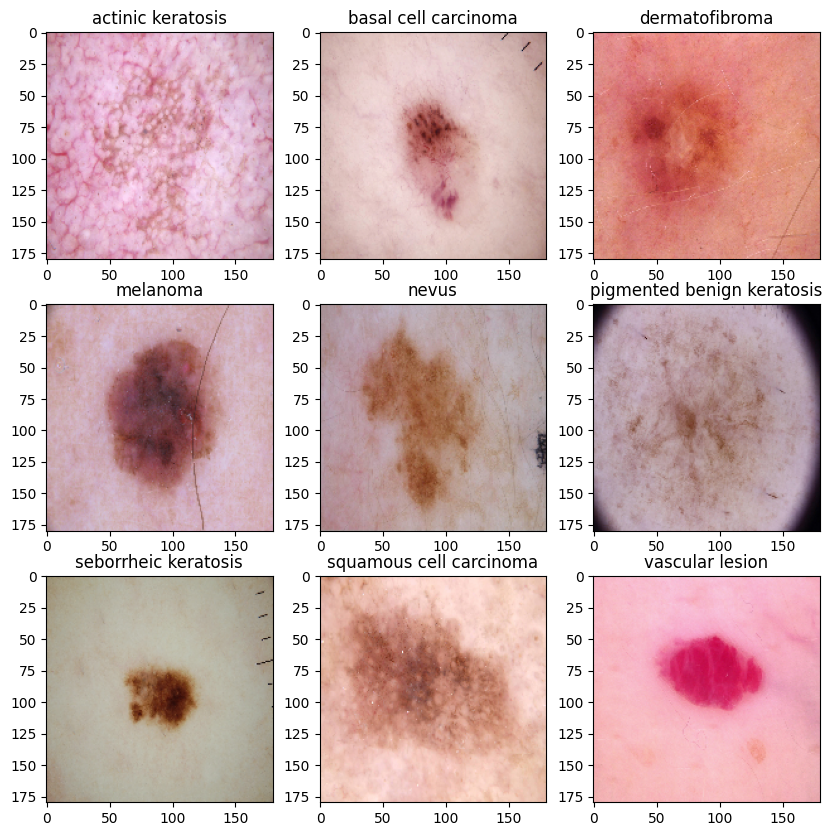

In [ ]:
#Visualize one instance of all the class present in the dataset.
#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.

# Path to get categorical data
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(train_path)+'/'+c+'/'+x, os.listdir(str(train_path)+'/'+c)))

plt.figure(figsize=(10,10))
i = 0
for c in class_names:
  path_list = files_path_dict[c][:1]
  i += 1
  plt.subplot(3,3,i)
  plt.imshow(load_img(path_list[0], target_size=(180,180)))
  plt.title(c)
  plt.axis=("off")


- Now let us visualize how the train data is distributed for each of the classes



In [ ]:
# Count the number of images in each of the class
count = []

# Iterate through the train directory
for path in pathlib.Path(train_path).iterdir():
  if path.is_dir():
    count.append(len([name for name in os.listdir(path)
                            if os.path.isfile(os.path.join(path, name))]))
print(count)
# Iterate through name of classes
sub_dir = [name for name in os.listdir(train_path)
            if os.path.isdir(os.path.join(train_path, name ))]
print(sub_dir)

#create dataframe with image count and class
df = pd.DataFrame(zip(sub_dir, count), columns= ['Class', 'No. of Images'])
df

[114, 462, 357, 95, 139, 77, 181, 376, 438]
['actinic keratosis', 'pigmented benign keratosis', 'nevus', 'dermatofibroma', 'vascular lesion', 'seborrheic keratosis', 'squamous cell carcinoma', 'basal cell carcinoma', 'melanoma']


,Class,No. of Images
0,actinic keratosis,114
1,pigmented benign keratosis,462
2,nevus,357
3,dermatofibroma,95
4,vascular lesion,139
5,seborrheic keratosis,77
6,squamous cell carcinoma,181
7,basal cell carcinoma,376
8,melanoma,438


<Axes: xlabel='No. of Images', ylabel='Class'>

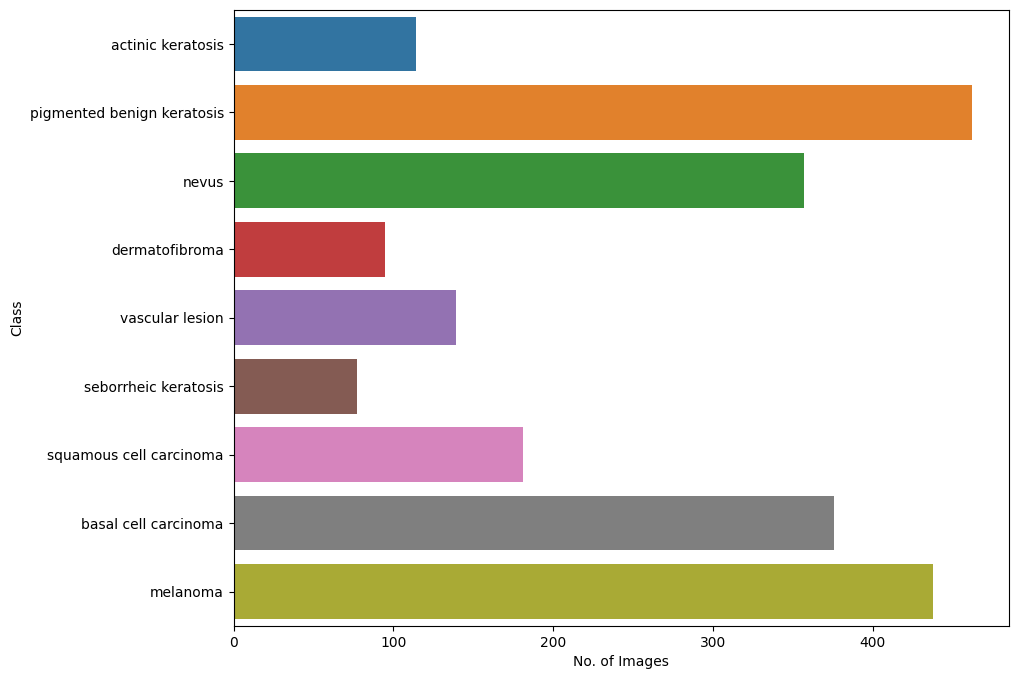

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x ="No. of Images", y = "Class", data = df, label = 'Class')

- Now let us autotune the appropriate number of processes that are free for working

In [ ]:
# we can use tf.data.experimental.AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Using `Dataset.cache()` we can keep the images in memory after they're loaded off disk during the first epoch.
# Using `Dataset.prefetch()` we can overlap data preprocessing and model execution while training.

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## CNN Model Architecture

- The CNN is a Sequential Model type which allows us to construct our Neural Network Architecture layer by layer
- The Architecture will be a combination of 2D convolution layers along with Max pooling in this architecture.
- We will be using activation functions Softmax and RelU.

### Architecture -> Rescaling + Convolution + Pooling + Dropout + Flatten + Dense


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

# Convolutional Neural Network Architecture
input_shape = (img_height,img_width,3)

#Sequential allows you to create models layer-by-layer
model = Sequential()

#First Convulation Layer
model.add(Rescaling(1./255,input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(Dense(512,activation='relu'))

#Dense Layer
model.add(Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(Dense(len(class_names),activation='softmax'))







- Visualizing the Model we created

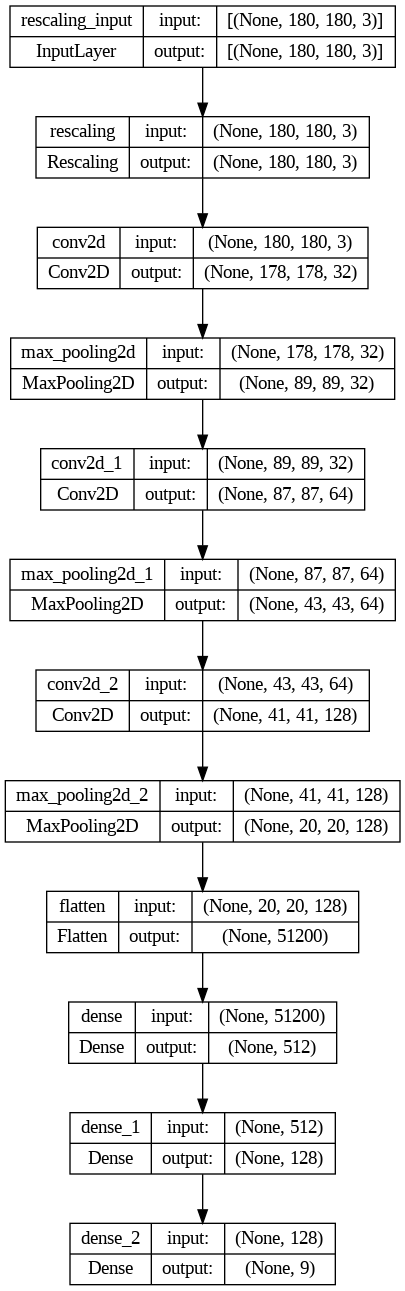

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='architecture.png', show_shapes=True, show_layer_names=True)

### Compiling the Model
- We are using the Adam Optimizer for adjusting the parameters of a neural network in real-time to improve its accuracy and speed.

**Early Stopping**: S form of regularization to prevent overfitting and improve the generalization ability of a model. It involves monitoring the performance of the model during training and stopping the training process before it reaches the optimal number of iterations.
- The idea behind early stopping is that, initially, as the model is being trained, the performance on the training data improves. However, after a certain point, the model starts to overfit the training data, resulting in a decrease in performance on unseen data. Early stopping allows us to prevent this overfitting by stopping the training process at an earlier point when the model's performance on a validation set starts to deteriorate.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

# Compiling the model
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])


# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
# so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5", monitor = "val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early Stopping
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode='auto', verbose=1)

### Training the Model
- We will train for 20 epochs to see how the model fits the data

Note: When we are using categorical crossentropy to compile our model, make sure that the train_ds and val_ds have the label_mode paraemter set to "categorical".

or training will throw an error like this:
```python
ValueError: Shapes (None, 1) and (None, 9) are incompatible
```

In [ ]:
# Training the CNN Model

epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint, earlystop])

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 1.9728 - accuracy: 0.2701
Epoch 1: val_accuracy improved from -inf to 0.36913, saving model to model.h5
56/56 [==============================] - 735s 6s/step - loss: 1.9728 - accuracy: 0.2701 - val_loss: 1.6521 - val_accuracy: 0.3691
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 1.6028 - accuracy: 0.4230
Epoch 2: val_accuracy improved from 0.36913 to 0.49664, saving model to model.h5
56/56 [==============================] - 160s 3s/step - loss: 1.6028 - accuracy: 0.4230 - val_loss: 1.4687 - val_accuracy: 0.4966
Epoch 3/20
56/56 [==============================] - ETA: 0s - loss: 1.4677 - accuracy: 0.5006
Epoch 3: val_accuracy did not improve from 0.49664
56/56 [==============================] - 166s 3s/step - loss: 1.4677 - accuracy: 0.5006 - val_loss: 1.5021 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - ETA: 0s - loss: 1.3749 - accuracy: 0.5084
Epoch 4: val_accuracy im

### Visualzing the Training Results
- Accuracy
- Loss

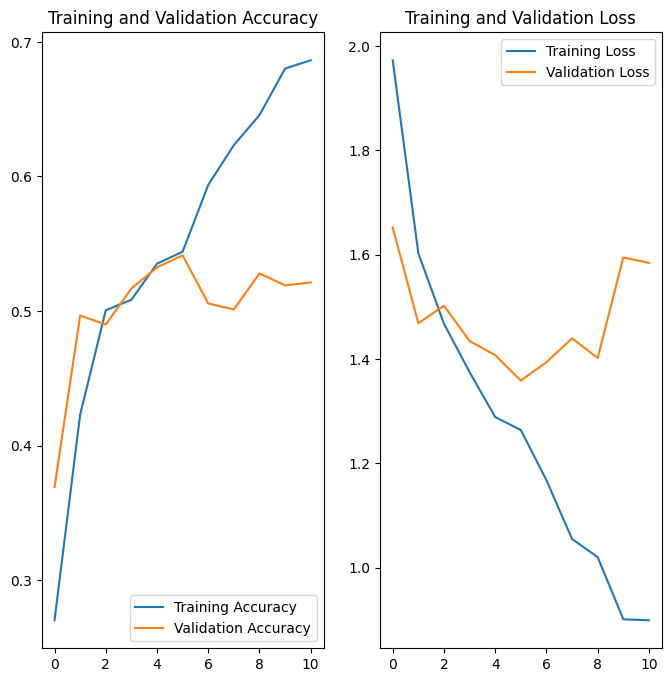

In [ ]:
# Accuracy Progression
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss Descent
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(earlystop.stopped_epoch+1)

# Plotting the results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Optimization
- We can see that our model is overfitting for training data in the graphs above
- Let us do some Optimization for improving accuracy and reducing loss

### Data Augmentation Strategy

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation, BatchNormalization

# We are constructing a sequential stack of layers to create a data augmentation stack
data_augmentation= Sequential([
    # Randomly flipping each image horizontally and verically
    RandomFlip("horizontal_and_vertical"),

    # Randomly rotate each image
    RandomRotation(0.2),

    # Randomly zoom each image during training by a certain percentage
    RandomZoom(0.2),

    # Randomly translate image height and width by a certain value
    RandomTranslation(0.1, 0.1),
])

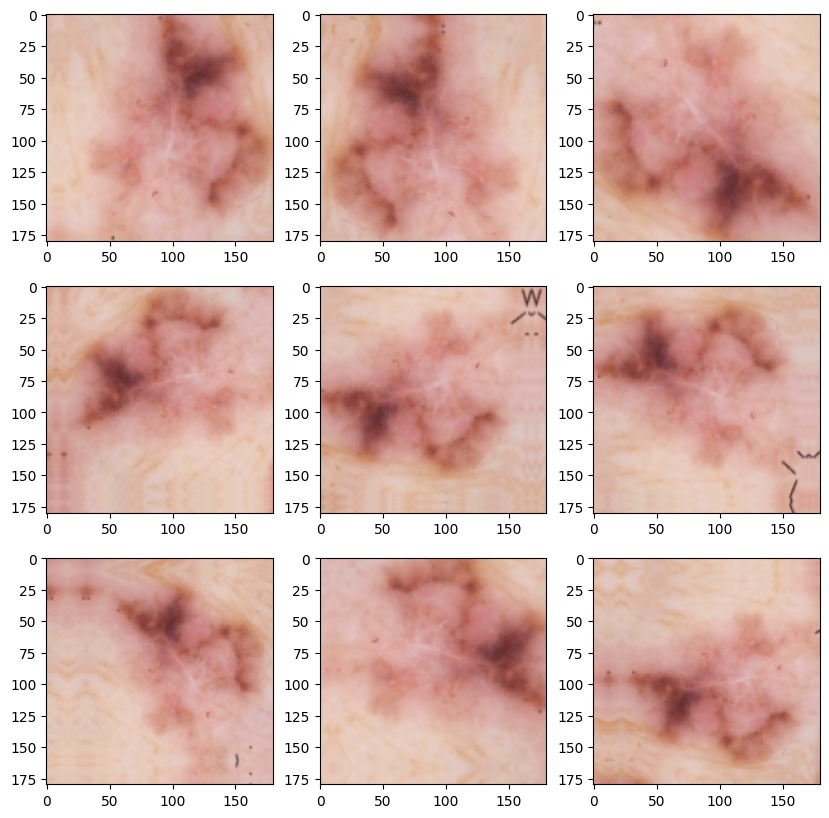

In [ ]:
# Visualize how our data augmentation works

plt.figure(figsize = (10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis=("off")

### Class Imbalance Correction

- As we can see, the number of images in each class is different, creating an imbalance in data.
- This can affect how our model gets trained and possibly create bias leading to improper results.
- We need to rectify the imbalance, we will use a python package called [Augmentor](https://augmentor.readthedocs.io/en/master/) to add more samples across all classes that have significantly lesser samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your `Pipeline` object.
3. Execute these operations by calling the `Pipeline’s` `sample()` method.

In [ ]:
import Augmentor

for i in class_names:
  p = Augmentor.Pipeline(str(train_path)+'/'+ i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500) ## We are bufferig the sample size to 500 per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF042F05990>: 100%|██████████| 500/500 [00:23<00:00, 21.33 Samples/s]


Initialised with 376 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF03CA4DC00>: 100%|██████████| 500/500 [00:17<00:00, 28.49 Samples/s]


Initialised with 95 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF040355F30>: 100%|██████████| 500/500 [00:23<00:00, 21.00 Samples/s]


Initialised with 438 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=960x724 at 0x7FF04052B460>: 100%|██████████| 500/500 [01:15<00:00,  6.65 Samples/s]


Initialised with 357 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FF0500F3130>: 100%|██████████| 500/500 [01:22<00:00,  6.06 Samples/s]


Initialised with 462 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF042E02710>: 100%|██████████| 500/500 [00:17<00:00, 28.80 Samples/s]


Initialised with 77 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF040396A70>: 100%|██████████| 500/500 [00:38<00:00, 13.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF0406F97B0>: 100%|██████████| 500/500 [00:18<00:00, 26.84 Samples/s]


Initialised with 139 image(s) found.
Output directory set to drive/MyDrive/Colab Notebooks/Skin cancer Data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF0403D2E00>: 100%|██████████| 500/500 [00:18<00:00, 27.53 Samples/s]


The Augmentor stores the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.
- Lets take a look at total count of augmented images.
- Let's also see the distribution of the training data after augmentation.
- To do that, we need tweak our data path a litle bit.

In [ ]:
# Count total number of images generated by Augmentor
augmented_image_count = len(list(train_path.glob('*/output/*.jpg')))
print(augmented_image_count)

# new train data path
path_list = [x for x in glob(os.path.join(train_path, '*','output', '*.jpg'))]

# new subdirectory
class_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_path, '*','output', '*.jpg'))]

# new dataframe
dataframe_dict_new = dict(zip(path_list, class_list_new))

#dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

#label count
df2['Label'].value_counts()

9000


actinic keratosis             1000
pigmented benign keratosis    1000
nevus                         1000
dermatofibroma                1000
vascular lesion               1000
seborrheic keratosis          1000
squamous cell carcinoma       1000
basal cell carcinoma          1000
melanoma                      1000
Name: Label, dtype: int64

### Re-Training the Model
- We have the new data.
- We will also use the augmentation layer we created earlier
- We will use Batch Normalization layer as well
- We will tune some layer parameters

**New Dataset Creation**
- We will create new training and validation splits with the augmented data

In [ ]:
# Training Dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                      train_path,
                                                      batch_size=batch_size,
                                                      image_size=(img_height,img_width),
                                                      label_mode="categorical",
                                                      seed=123,
                                                      subset="training",
                                                      validation_split=0.2)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [ ]:
# Validation Dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                            train_path,
                                            seed=123,
                                            validation_split = 0.2,
                                            subset = "validation",
                                            image_size=(img_height, img_width),
                                            label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
                                            batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [ ]:
# we can use tf.data.experimental.AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Using `Dataset.cache()` we can keep the images in memory after they're loaded off disk during the first epoch.
# Using `Dataset.prefetch()` we can overlap data preprocessing and model execution while training.

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model

#Model

model2 = Sequential()

model2.add(Rescaling(1./255,input_shape=input_shape))   #Rescaling Layer

#First Convulation layer
model2.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

#Second Convulation Layer
model2.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

#Third Convulation Layer
model2.add(Conv2D(128,kernel_size=(2,2),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model2.add(Flatten())

#Dense Layer
model2.add(Dense(512,activation='relu'))

#Dropout layer
model2.add(Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization
#of the layers' inputs by re-centering and re-scaling.
model2.add(BatchNormalization())

#Dense Layer
model2.add(Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(Dropout(0.50))

#Batch normalization
model2.add(BatchNormalization())

#Dense layer with Softmax activation function.
model2.add(Dense(len(class_names),activation='softmax'))

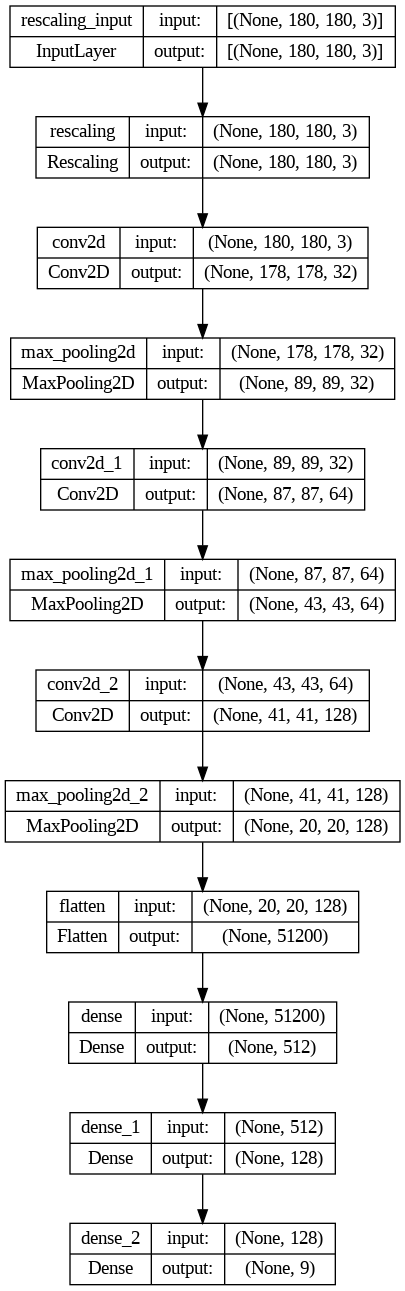

In [ ]:
plot_model(model, to_file='architecture_optimized.png', show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(optimizer='Adam',
                loss="categorical_crossentropy",
                metrics=['accuracy'])

In [ ]:
epochs = 30
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/30
281/281 [==============================] - 2632s 4s/step - loss: 2.2744 - accuracy: 0.2143 - val_loss: 3.7624 - val_accuracy: 0.1304
Epoch 2/30
281/281 [==============================] - 684s 2s/step - loss: 1.6649 - accuracy: 0.3630 - val_loss: 1.9188 - val_accuracy: 0.3280
Epoch 3/30
281/281 [==============================] - 692s 2s/step - loss: 1.4638 - accuracy: 0.4363 - val_loss: 1.4334 - val_accuracy: 0.4054
Epoch 4/30
281/281 [==============================] - 696s 2s/step - loss: 1.3255 - accuracy: 0.4882 - val_loss: 1.4040 - val_accuracy: 0.4312
Epoch 5/30
281/281 [==============================] - 735s 3s/step - loss: 1.2420 - accuracy: 0.5231 - val_loss: 1.3509 - val_accuracy: 0.4562
Epoch 6/30
281/281 [==============================] - 709s 3s/step - loss: 1.1650 - accuracy: 0.5624 - val_loss: 1.2092 - val_accuracy: 0.5127
Epoch 7/30
281/281 [==============================] - 699s 2s/step - loss: 1.0331 - accuracy: 0.6114 - val_loss: 1.1291 - val_accuracy: 0.546

### Visualizing the Results
- Training vs Validation
  - Accuracy
  - Loss

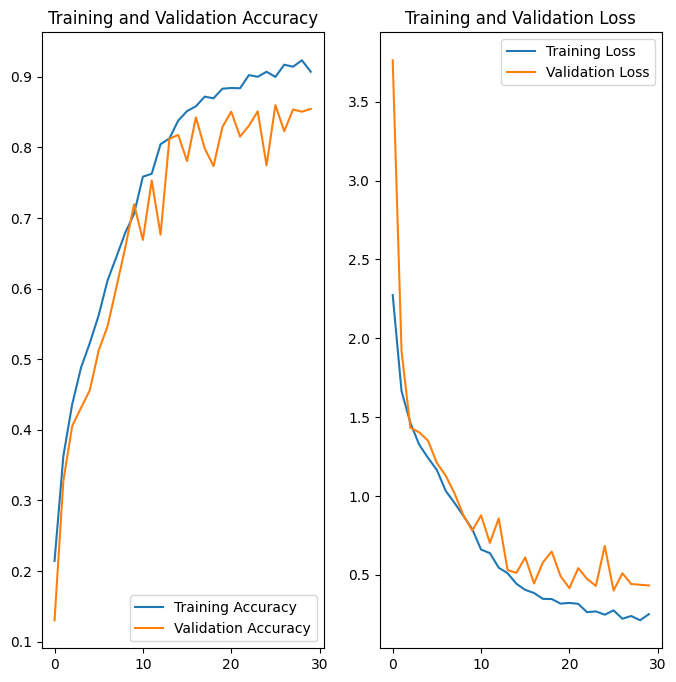

In [ ]:
# Accuracy Progression
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss Descent
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Plotting the results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Comparing our Results

|                         | Before Optimization | After Optimiazation     |
| :---                    |    :----:           |         :---:           |
| **Training Accuracy**   | 0.6864              | 0.9070                  |
| **Validation Accuracy** | 0.5213              | 0.8545                  |
|                         |                     |                         |
| **Training Loss**       | 0.8989              | 0.2514                  |
| **Validation Loss**     | 1.5843              | 0.4331                  |


      